# Import Main Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
# store csv into panda
df = pd.read_csv("lyrics.csv")

In [3]:
# display panda info
df.info()
# check shape of panda
print("\n# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB

# of rows: 362237
# of columns: 6


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


# Clean Data
### Clean Data in General
There are missing data in the lyrics section with only 266557 non-null object compared to 362237 non-null objects for others.
We delete the index column as the order of the songs are not important.

In [4]:
# drop any row with missing data
df = df.dropna()
# drop column 'index'
df = df.drop('index',1)

In [5]:
# display panda info
df.info()
# check shape of data frame
print("\n# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 5 columns):
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(1), object(4)
memory usage: 12.2+ MB

# of rows: 266556
# of columns: 5


,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


### Clean data by column 'songs'

In [6]:
# check the types of unique songs
songs = df['song'].unique()
# sort in descending order
songs.sort()
# display how many types of unique songs
print("# of unique songs: {}\n".format(len(songs)))
# print sorted array of unique songs
print(songs)

# of unique songs: 187186

['0-0' '0-0-0' '0-0-where-evil-dwells' ..., 'zzz-top' 'zzzonked' 'zzzzz']


### Clean data by column 'years'

In [7]:
# check the types of unique years
years = df['year'].unique()
# sort in descending order
years.sort()
# display how many types of unique years
print("# of unique years: {}\n".format(len(years)))
# print sorted array of unique years
print(years)

# of unique years: 51

[  67  112  702 1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]


As we can see from above, there are year 67, 112, 702.
We delete these years as they are not after 1900s.

In [8]:
# delete years < 1900s
df = df[(df['year'] > 1900)]
# check the types of unique years left
years = df['year'].unique()
# sort in descending order
years.sort()
# display how many types of unique years
print("# of unique years: {}\n".format(len(years)))
# print sorted array of unique years
print(years)

# of unique years: 48

[1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


### Clean data by column 'artist'

In [9]:
# check the types of unique artists
artists = df['artist'].unique()
# sort in descending order
artists.sort()
# display how many types of unique artists
print("# of unique artists: {}\n".format(len(artists)))
# print sorted array of unique artists
print(artists)

# of unique artists: 14543

['009-sound-system' '047' '0510' ..., 'the-graveyard-boulevard'
 'the-great-flood-catastrophe' 'ykforward-russia']


### Clean data by column 'genre'

In [10]:
# check the types of unique genre
genres = df['genre'].unique()
# sort in descending order
genres.sort()
# display how many types of unique genres
print("# of unique genre: {}\n".format(len(genres)))
# print sorted array of unique genres
print(genres)

# of unique genre: 12

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal'
 'Not Available' 'Other' 'Pop' 'R&B' 'Rock']


As we can see above, we have genre 'Not Available' and 'Other'.
To simplify, we delete them out of the data set.

In [11]:
# delete genres 'Not Available' and 'Other'
df = df[(df['genre'] != 'Not Available') & (df['genre'] != 'Other')]
# check how many types of unique genres left
genres = df['genre'].unique()
# sort in descending order
genres.sort()
# display how many types of unique genres
print("# of unique genres: {}\n".format(len(genres)))
# print sorted array of unique genres
print(genres)

# of unique genres: 10

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal' 'Pop' 'R&B'
 'Rock']


### Clean data by column 'lyrics'

In [12]:
# check lyrics data
df['lyrics'].head()

0    Oh baby, how you doing?\nYou know I'm gonna cu...
1    playin' everything so easy,\nit's like you see...
2    If you search\nFor tenderness\nIt isn't hard t...
3    Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...
4    Party the people, the people the party it's po...
Name: lyrics, dtype: object

In [13]:
# Replace all \n with space
df = df.replace({'\n':' '}, regex=True)

In [14]:
# check how data changed
df['lyrics'].head()

0    Oh baby, how you doing? You know I'm gonna cut...
1    playin' everything so easy, it's like you seem...
2    If you search For tenderness It isn't hard to ...
3    Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...
4    Party the people, the people the party it's po...
Name: lyrics, dtype: object

In [15]:
# count the words in each song
df['word_count'] = df['lyrics'].str.split().str.len()
df.head()

,song,year,artist,genre,lyrics,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [16]:
# check some statistic based on word counts grouped by genre
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14387.0,186.086397,82.999049,1.0,128.0,171.0,231.0,1366.0
Electronic,7966.0,193.376475,138.816594,1.0,100.0,170.0,260.0,1920.0
Folk,2243.0,181.037004,120.616688,1.0,111.0,168.0,238.0,2393.0
Hip-Hop,24845.0,489.983256,238.632524,1.0,340.0,485.0,629.0,8195.0
Indie,3149.0,196.854239,108.375014,1.0,126.0,183.0,248.0,1262.0
Jazz,7970.0,172.067252,97.430118,1.0,108.0,152.0,215.0,1040.0
Metal,23759.0,169.068774,112.809568,1.0,100.0,152.0,217.0,2423.0
Pop,40465.0,245.741629,128.699888,1.0,157.0,224.0,311.0,1704.0
R&B,3401.0,224.931785,120.049328,1.0,142.0,204.0,281.0,1440.0


It's odd that there are songs with 1 word from the min section of every genre.
Let's check what they are.

In [17]:
# display the top songs with 1 word
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] == 1])))
df.loc[df['word_count'] == 1].head()

# of songs with 1 word: 3212


,song,year,artist,genre,lyrics,word_count
420,dying-sun,2011,demonaz,Metal,[Instrumental],1
1410,curtain-call,2011,brandi-carlile,Country,INSTRUMENTAL,1
1710,mary-mheaigi-s-frank-mors-the-trip-to-lerwick,2007,andy-m-stewart,Folk,Instrumental,1
1733,treorachadh,2007,andy-m-stewart,Folk,Instrumental,1
1841,providence,2007,dreadful-shadows,Rock,[Instrumental],1


The 1-worded songs are mostly instrumental.
Let's delete them from the data set as they essentially don't have lyrics.

In [18]:
# delete songs with 1 word
df = df[df['word_count'] != 1]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14323.0,186.913426,82.254845,3.0,129.0,171.0,231.00,1366.0
Electronic,7620.0,202.111680,135.602990,2.0,110.0,177.0,264.00,1920.0
Folk,2108.0,192.566888,115.198695,4.0,121.0,175.0,244.00,2393.0
Hip-Hop,24760.0,491.661914,237.312650,2.0,341.0,486.0,629.25,8195.0
Indie,3104.0,199.693621,106.541654,3.0,128.0,184.0,249.00,1262.0
Jazz,7825.0,175.237188,95.478588,2.0,110.0,153.0,216.00,1040.0
Metal,22995.0,174.652794,110.359008,2.0,105.0,155.0,220.00,2423.0
Pop,40262.0,246.975610,127.842247,2.0,158.0,225.0,311.00,1704.0
R&B,3391.0,225.592156,119.607676,2.0,142.0,204.0,281.50,1440.0


There are still some songs with 2, 3 words.
Let's check them if they have lyrics.

In [19]:
# display the top songs with 2 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] == 2])))
df.loc[df['word_count'] == 2].head()

# of songs with 1 word: 186


,song,year,artist,genre,lyrics,word_count
2735,terminal,2007,antimatter,Rock,[Patterson] [instrumental],2
3751,instinct,2007,claire-voyant,Pop,Tekst niedostę,2
4089,democracy,2007,disbelief,Metal,[Killing Joke-Cover],2
9170,niaaea,2006,adaaeaaineay-iaidiia,Rock,- .,2
9173,odaiaae,2006,adaaeaaineay-iaidiia,Rock,- ...,2


In [20]:
# display the top songs with 3 words
print("# of songs with 3 words: {}".format(len(df.loc[df['word_count'] == 3])))
df.loc[df['word_count']  == 3].head()

# of songs with 3 words: 198


,song,year,artist,genre,lyrics,word_count
2688,enhorabuena,2014,el-arrebato,Pop,El Arrebato Enhorabuena,3
5803,because-you-acute-re-mine,2006,bryan-ferry,Rock,Because you're mine,3
7509,wickedness-act,2007,celesty,Metal,[Japanese Bonus Track],3
7639,malice,2001,behemoth,Metal,[Lyrics not available],3
9164,edaniue-niao,2006,adaaeaaineay-iaidiia,Rock,", , ,",3


In [21]:
# display the top songs with 3 words
print("# of songs with 3 words: {}".format(len(df.loc[df['word_count'] < 50])))

# of songs with 3 words: 6825


In [22]:
# check the proportion of songs with less 100 words compared to the entire data set
print("# of songs < 50 words: {}".format(len(df[df['word_count'] < 50])))
print("# of total songs: {}".format(len(df)))
print("% of songs < 50 words: {}%".format(len(df[df['word_count'] < 50])/len(df)*100))

# of songs < 50 words: 6825
# of total songs: 234208
% of songs < 50 words: 2.914076376554174%


Since we are only eliminating about 3% of the entire data set by deleting songs less than 50 words, we will do this to simplify the data set.

In [23]:
# delete songs with 1 word
df = df[df['word_count'] > 50]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14204.0,188.253520,81.267609,51.0,130.0,172.0,231.0,1366.0
Electronic,6993.0,217.772344,130.525636,51.0,126.0,190.0,273.0,1920.0
Folk,2018.0,199.837463,112.317991,51.0,129.0,179.0,247.0,2393.0
Hip-Hop,24186.0,502.707682,228.881699,51.0,353.0,492.0,634.0,8195.0
Indie,3030.0,203.797360,104.489909,52.0,133.0,186.5,251.0,1262.0
Jazz,7675.0,178.039609,94.238820,51.0,112.0,156.0,218.0,1040.0
Metal,21603.0,184.207286,106.957901,51.0,114.0,161.0,225.0,2423.0
Pop,39623.0,250.486182,125.807910,51.0,161.0,227.0,313.0,1704.0
R&B,3350.0,227.995522,118.323421,52.0,144.0,205.0,282.0,1440.0


Let's now check the overall distribution of the songs.

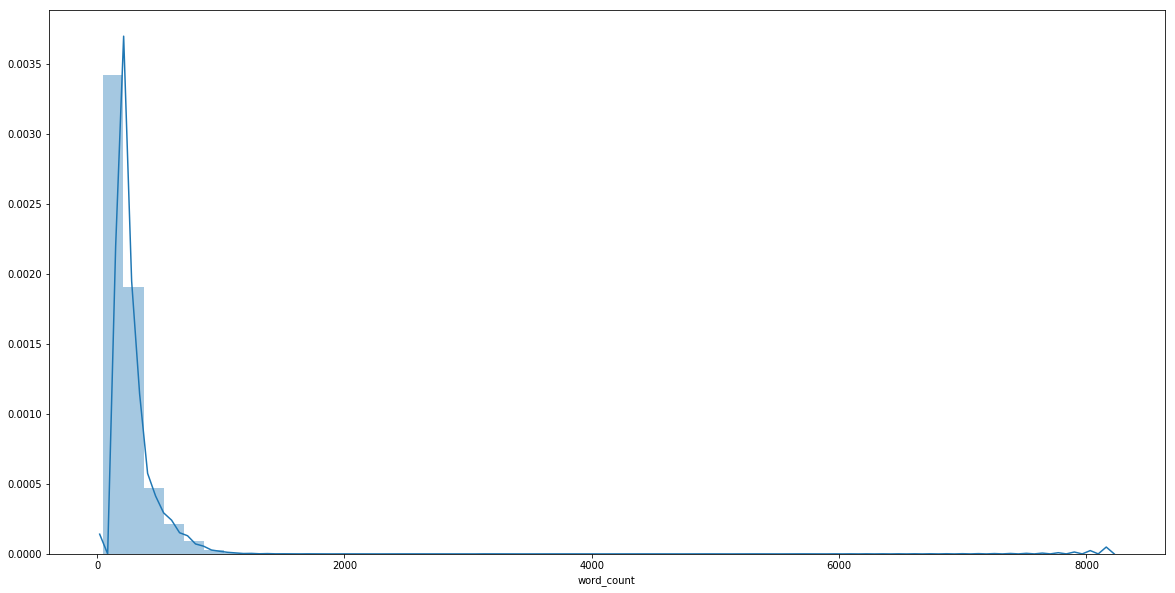

In [24]:
# check distribution of data set
plt.figure(figsize=(20,10))
sns.distplot(df["word_count"])
plt.show()

The word count is extremely skewed to the right.
Let's see what the lyrics are for some high word counts.

In [25]:
# display the top songs with more then 8000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 8000])))
df.loc[df['word_count'] > 8000].head()

# of songs with 1 word: 1


,song,year,artist,genre,lyrics,word_count
18869,rap-monument,2014,flatbush-zombies,Hip-Hop,RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...,8195


In [26]:
# display the top songs with more then 5000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 5000])))
df.loc[df['word_count'] > 5000].head()

# of songs with 1 word: 3


,song,year,artist,genre,lyrics,word_count
15620,yes-sir-i-will,2007,crass,Rock,"The door stands open - Across lines, invisible...",6232
18869,rap-monument,2014,flatbush-zombies,Hip-Hop,RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...,8195
89953,freestyle-june-27,2007,big-moe,Hip-Hop,"(Big Moe) Yeee-yeee haahee yeehaa, yeee-yaahee...",5085


In [27]:
# display the top songs with more then 1000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 1000])))
df.loc[df['word_count'] > 1000].head()

# of songs with 1 word: 572


,song,year,artist,genre,lyrics,word_count
95,get-me-bodied,2006,beyonce-knowles,Pop,"Nine, four, eight, one B day Mission one: I'm-...",1122
113,get-me-bodied-extended-remix-bonus-track,2006,beyonce-knowles,Pop,"Nine, four, eight, one B'day Mission one, Ima ...",1014
1590,tour-hip-hop-version,2006,capleton,Electronic,Yeah I say straighten yuh crooked ways Blessed...,1034
2339,burnt,2007,del-the-funky-homosapien,Hip-Hop,"DEL: Mista, twista, get ya every single time w...",1068
7464,stan,2006,dido,Pop,My tea's gone cold I'm wondering why I Got out...,1238


In [28]:
# check the proportion of songs with less 100 words compared to the entire data set
print("# of songs < 1000 words: {}".format(len(df[df['word_count'] > 1000])))
print("# of total songs: {}".format(len(df)))
print("% of songs < 1000 words: {}%".format(len(df[df['word_count'] > 1000])/len(df)*100))

# of songs < 1000 words: 572
# of total songs: 227180
% of songs < 1000 words: 0.2517827273527599%


Since there are only 0.25% of songs with 1000 words, let's eliminate them to simplify data set.

In [29]:
# delete songs with more than 1000 worda
df = df[df['word_count'] < 1000]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14203.0,188.170598,80.667305,51.0,130.0,172.0,231.0,895.0
Electronic,6989.0,217.124052,127.434446,51.0,126.0,190.0,273.0,990.0
Folk,2016.0,198.216766,98.313421,51.0,129.0,179.0,247.0,998.0
Hip-Hop,23735.0,489.282831,197.858712,51.0,350.0,487.0,623.0,999.0
Indie,3027.0,202.890320,100.437058,52.0,133.0,186.0,251.0,952.0
Jazz,7674.0,177.927287,93.729772,51.0,112.0,156.0,218.0,935.0
Metal,21590.0,183.510607,102.359617,51.0,114.0,161.0,225.0,999.0
Pop,39595.0,249.839576,123.408581,51.0,161.0,227.0,313.0,999.0
R&B,3348.0,227.329450,115.151365,52.0,144.0,205.0,282.0,892.0


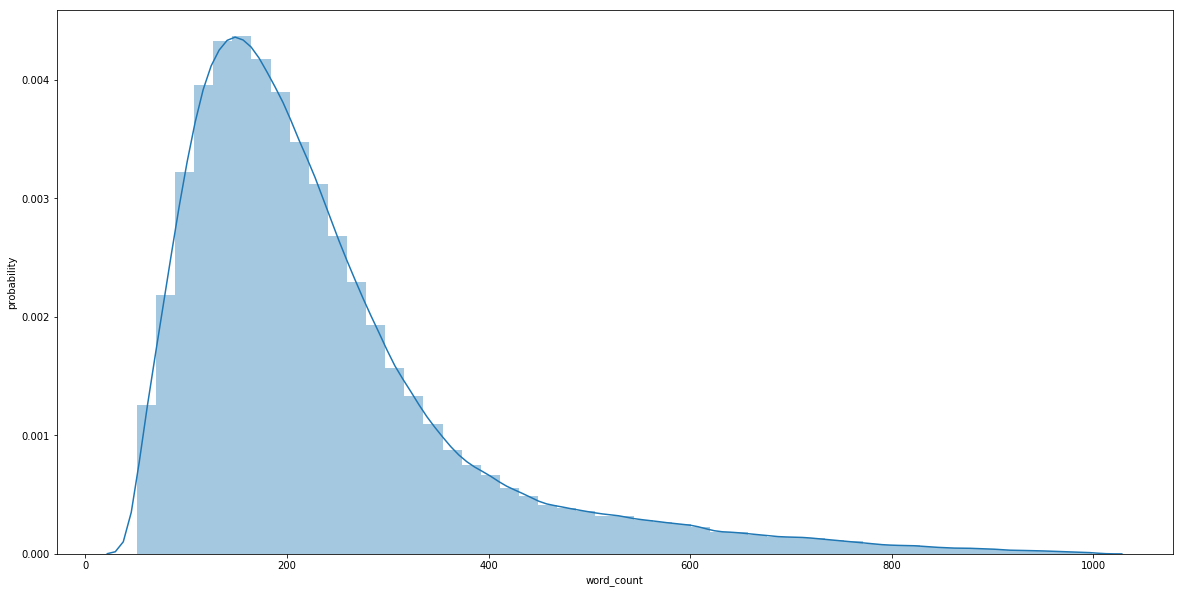

In [30]:
# check distribution of data set
plt.figure(figsize=(20,10))
sns.distplot(df["word_count"])
plt.ylabel("probability")
plt.show()

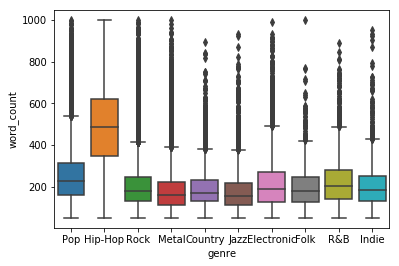

In [31]:
sns.boxplot(x="genre", y="word_count", data=df)
plt.figure(figsize=(20,10))
plt.show()

In [32]:
# display panda info
df.info()
# check shape of data frame
print("# of rows: {}\n".format(df.shape[0]))
print("# of columns: {}\n".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226602 entries, 0 to 362236
Data columns (total 6 columns):
song          226602 non-null object
year          226602 non-null int64
artist        226602 non-null object
genre         226602 non-null object
lyrics        226602 non-null object
word_count    226602 non-null int64
dtypes: int64(2), object(4)
memory usage: 22.1+ MB
# of rows: 226602

# of columns: 6



,song,year,artist,genre,lyrics,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [33]:
genre = df.groupby(['genre']).count()[['song']]
genre

,song
genre,
Country,14203
Electronic,6989
Folk,2016
Hip-Hop,23735
Indie,3027
Jazz,7674
Metal,21590
Pop,39595
R&B,3348


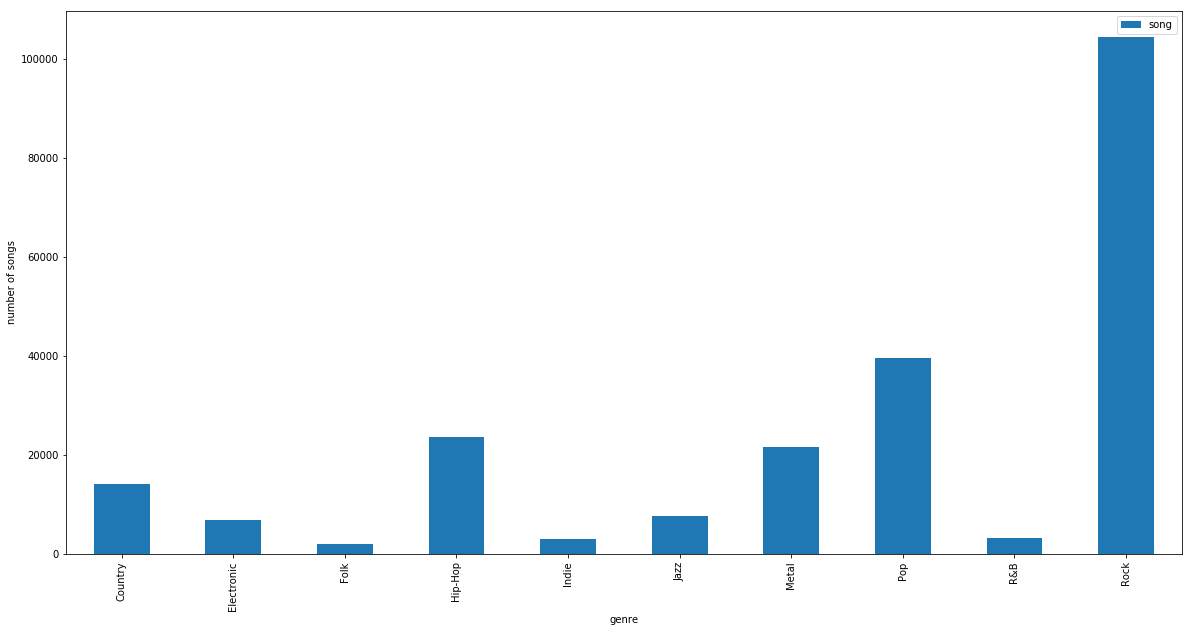

In [34]:
genre.plot(kind='bar', figsize=(20,10))
plt.ylabel("number of songs")
plt.show()

In [35]:
artist = df.groupby(['artist']).count()[['song']]
artist.head()

,song
artist,
009-sound-system,4
047,1
1-800-zombie,2
10-cc,142
10-years,74


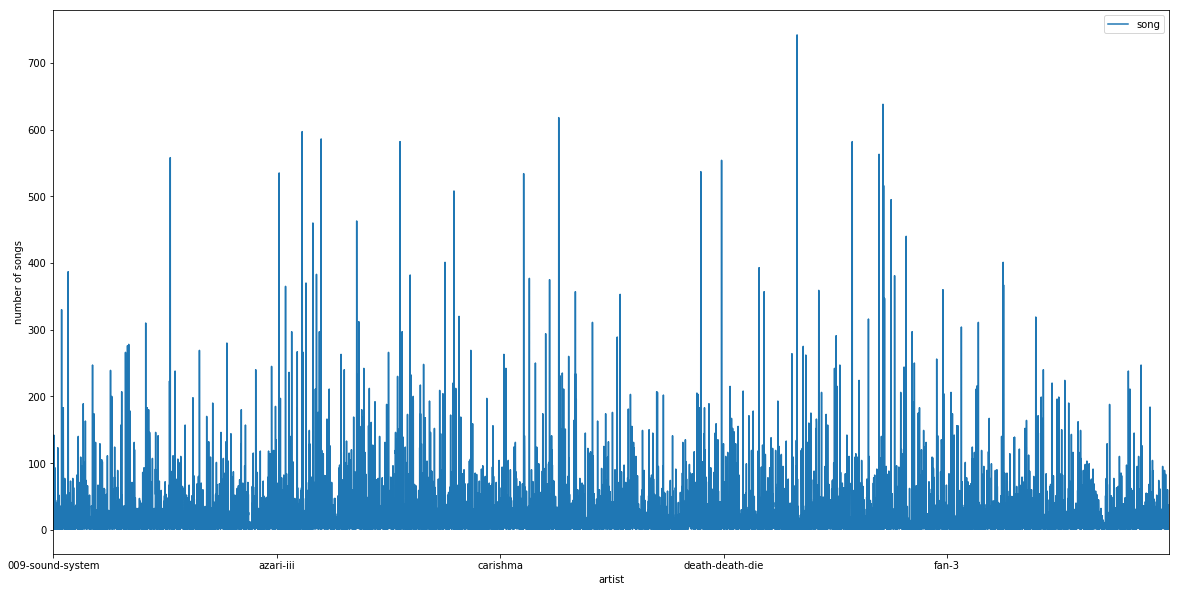

In [36]:
artist.plot(figsize=(20,10))
plt.ylabel("number of songs")
plt.show()

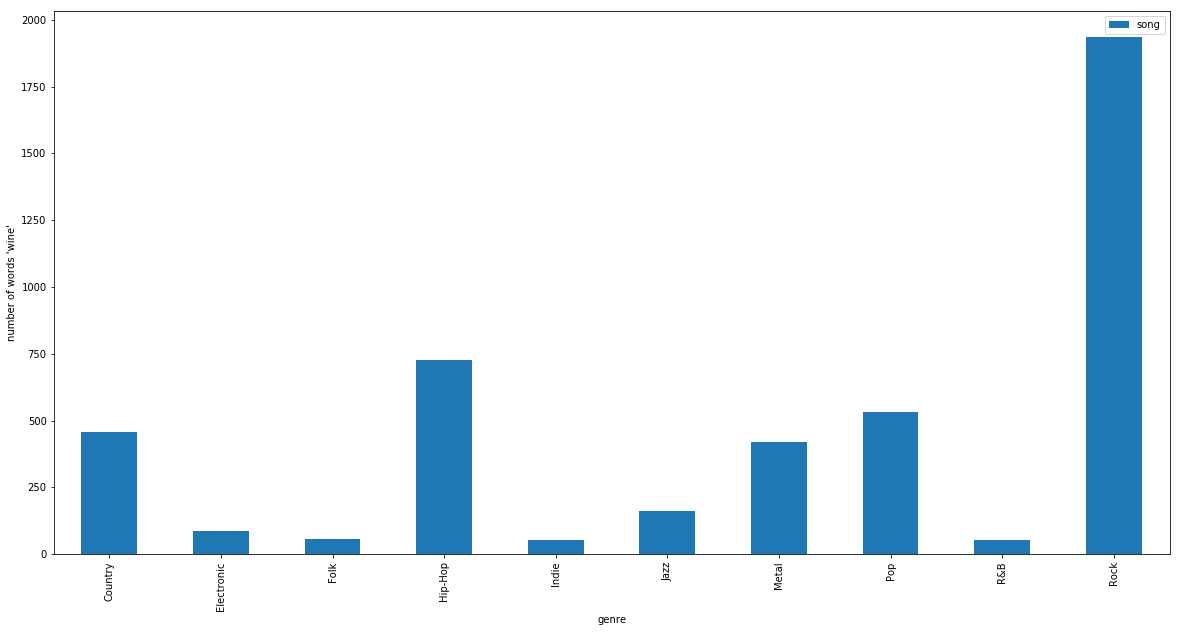

In [37]:
wine_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('wine')].count()))
wine_count.rename(columns={"lyrics":"song"}, inplace=True)
wine_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'wine'")
plt.show()

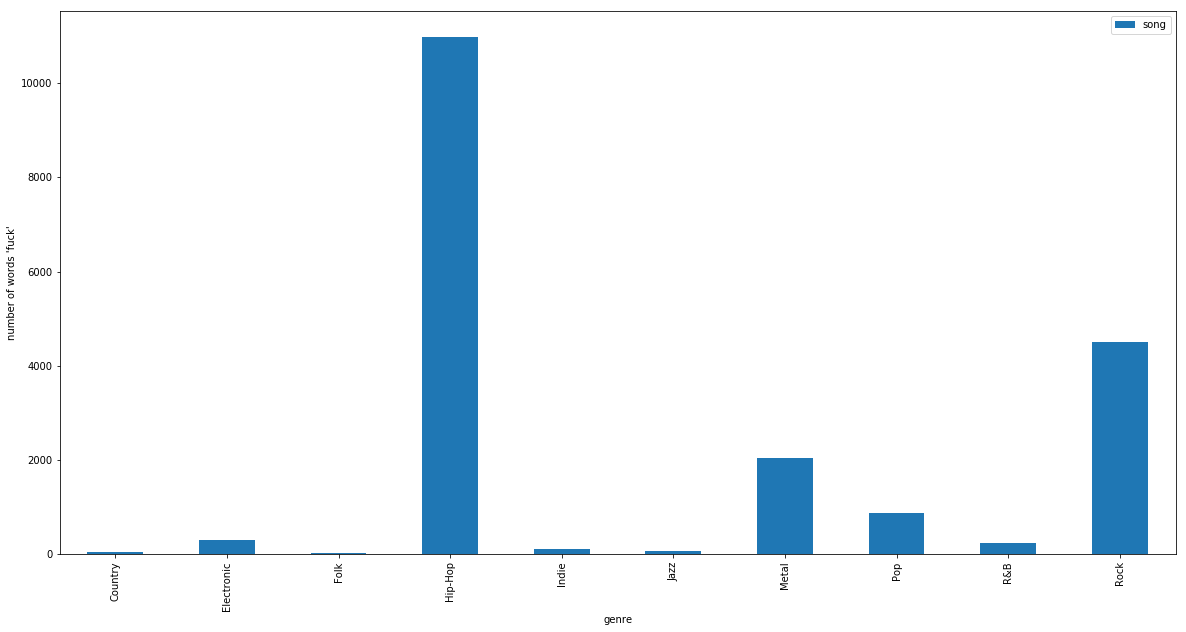

In [38]:
fuck_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('fuck')].count()))
fuck_count.rename(columns={"lyrics":"song"}, inplace=True)
fuck_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'fuck'")
plt.show()

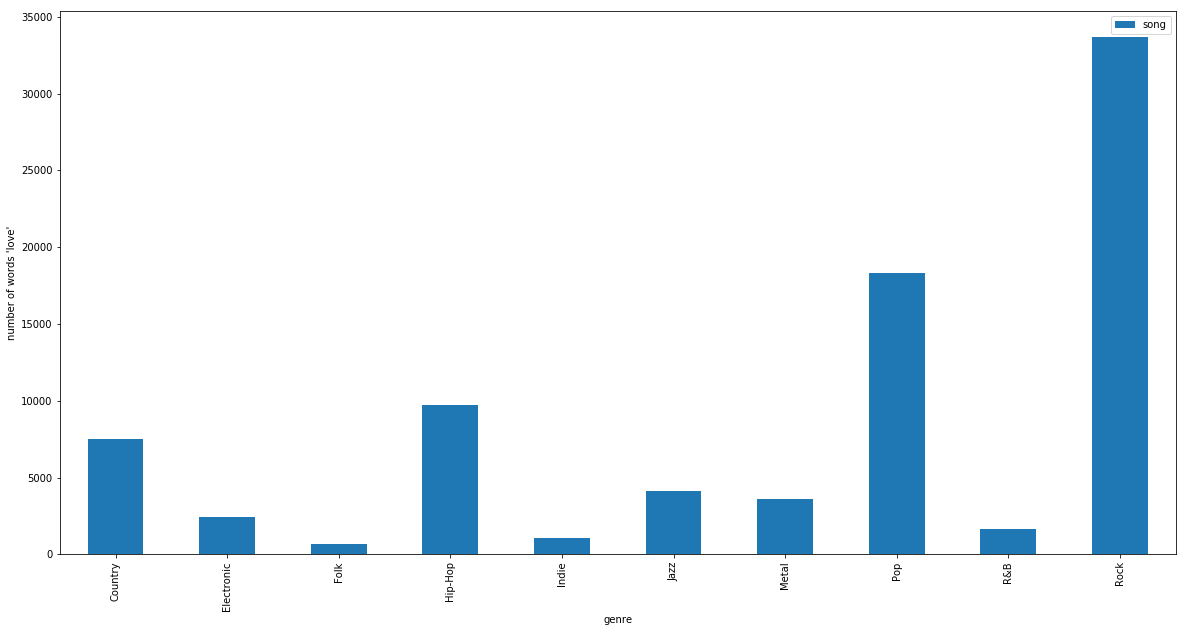

In [39]:
love_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('love')].count()))
love_count.rename(columns={"lyrics":"song"}, inplace=True)
love_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'love'")
plt.show()

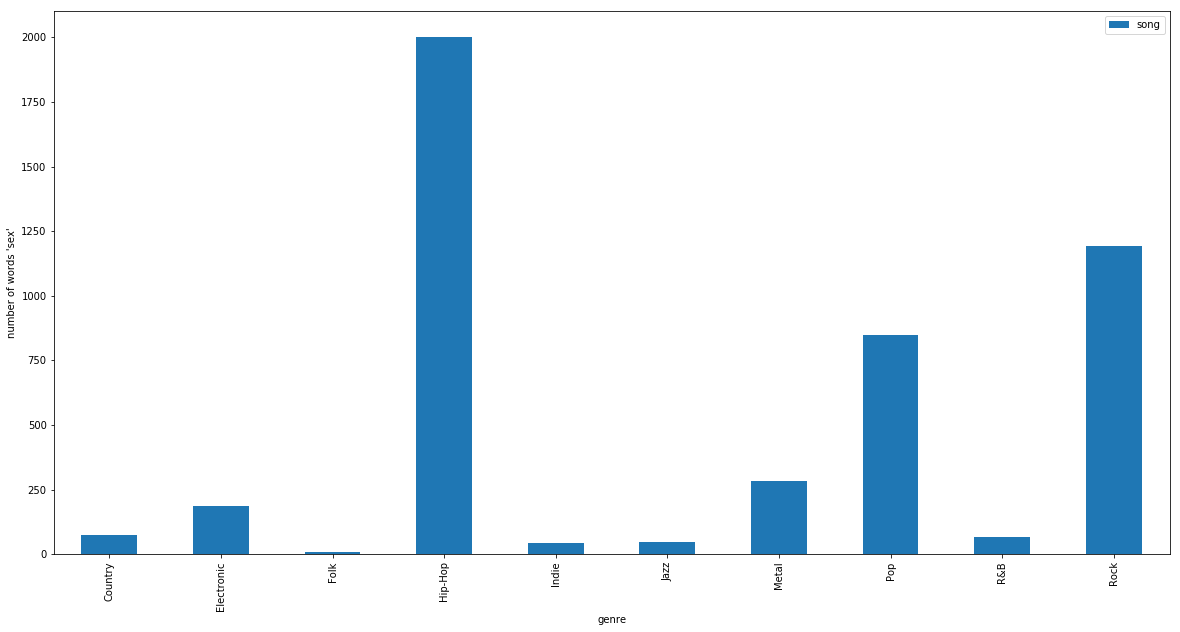

In [40]:
plt.figure(figsize=(20,10))
sex_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('sex')].count()))
sex_count.rename(columns={"lyrics":"song"}, inplace=True)
sex_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'sex'")
plt.show()

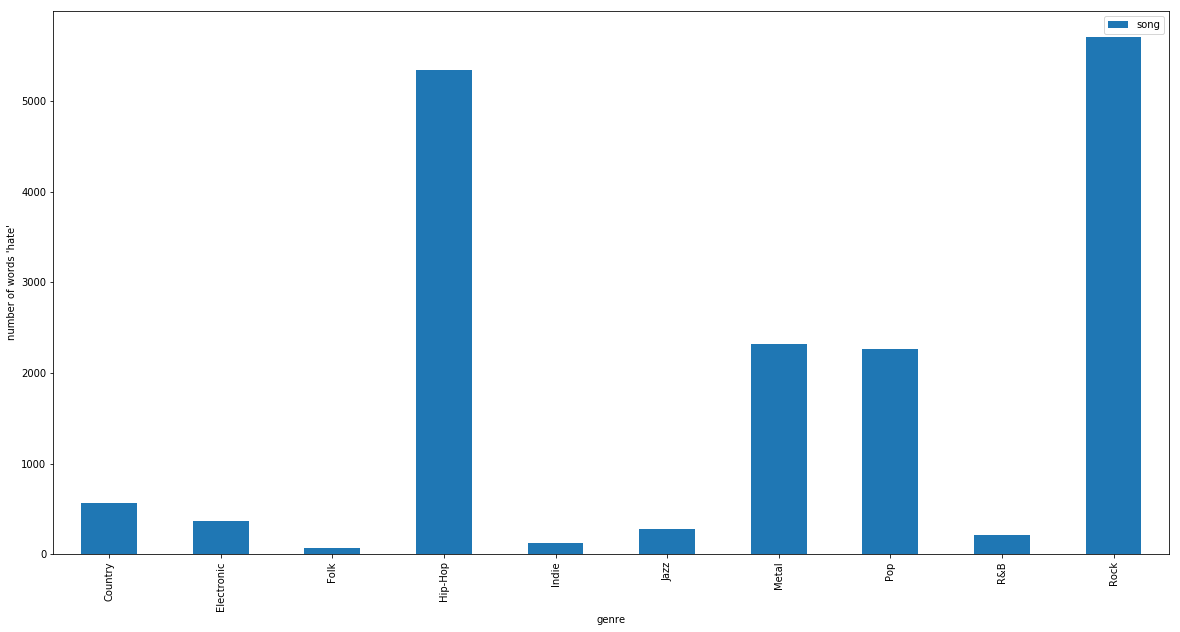

In [41]:
hate_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('hate')].count()))
hate_count.rename(columns={"lyrics":"song"}, inplace=True)
hate_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'hate'")
plt.show()

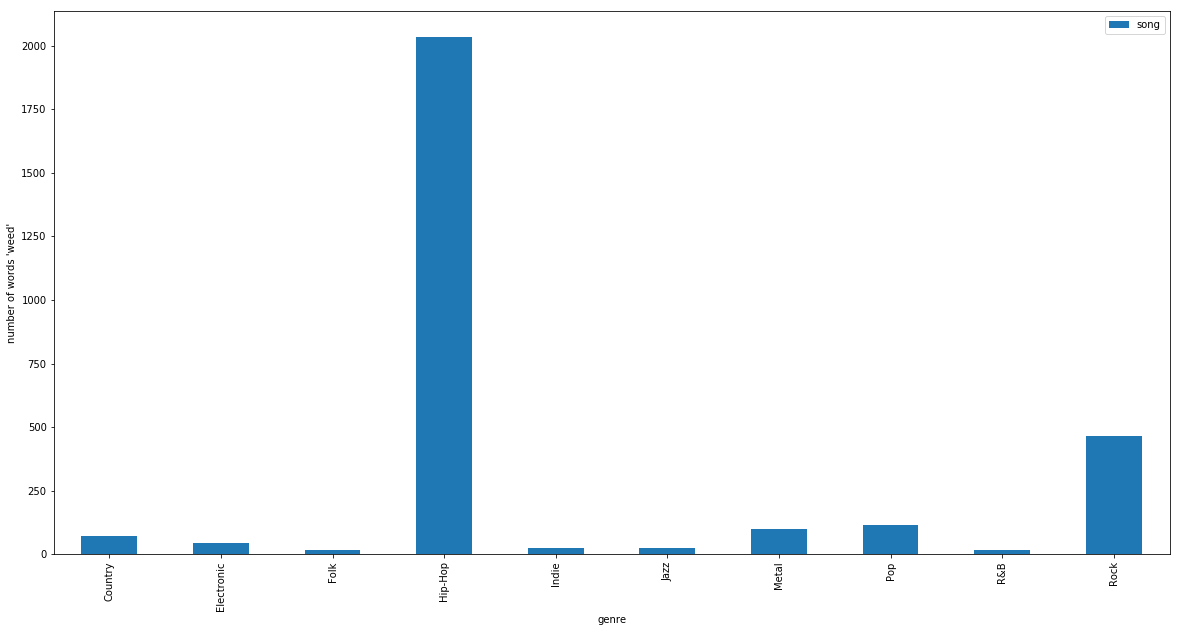

In [42]:
weed_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('weed')].count()))
weed_count.rename(columns={"lyrics":"song"}, inplace=True)
weed_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'weed'")
plt.show()

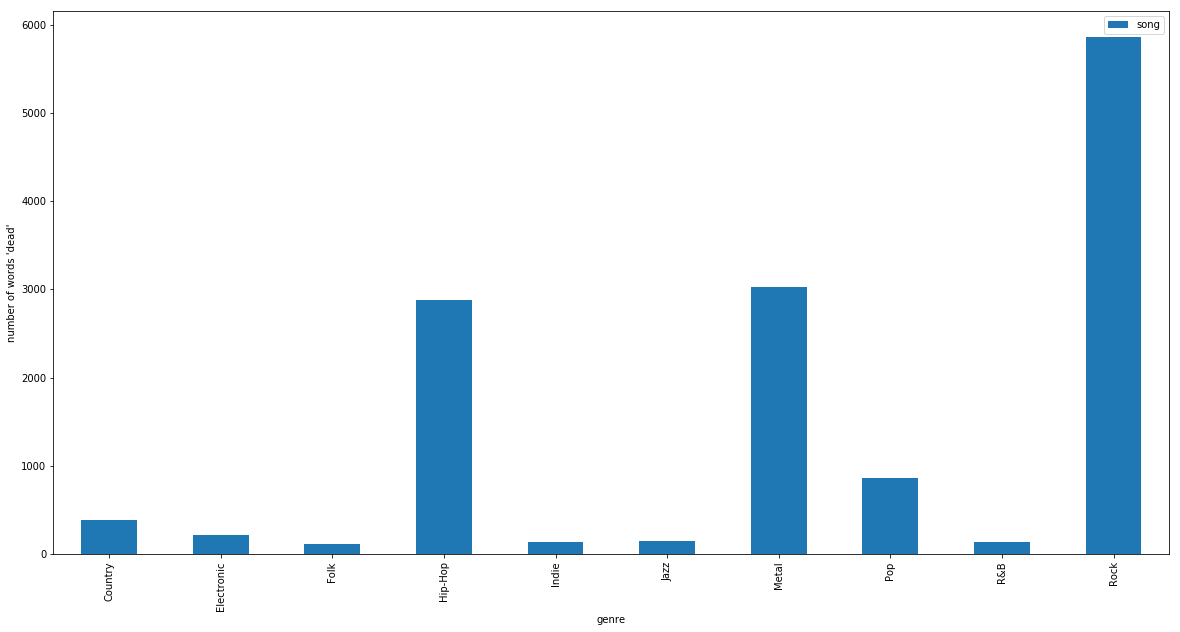

In [43]:
dead_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('dead')].count()))
dead_count.rename(columns={"lyrics":"song"}, inplace=True)
dead_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'dead'")
plt.show()

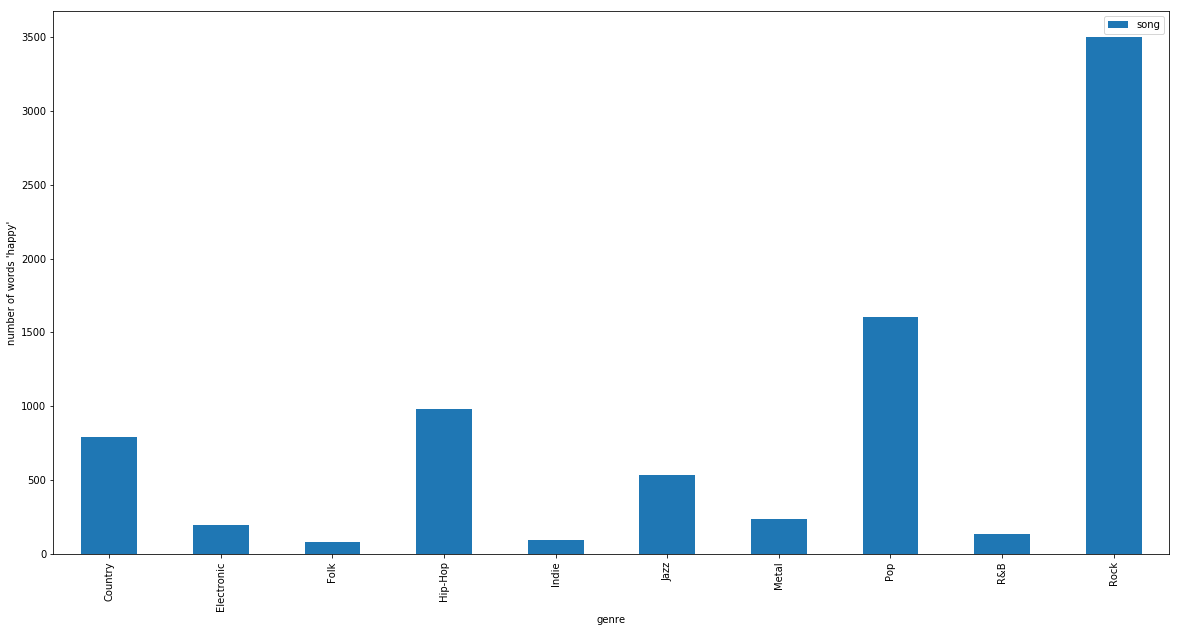

In [44]:
happy_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('happy')].count()))
happy_count.rename(columns={"lyrics":"song"}, inplace=True)
happy_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'happy'")
plt.show()

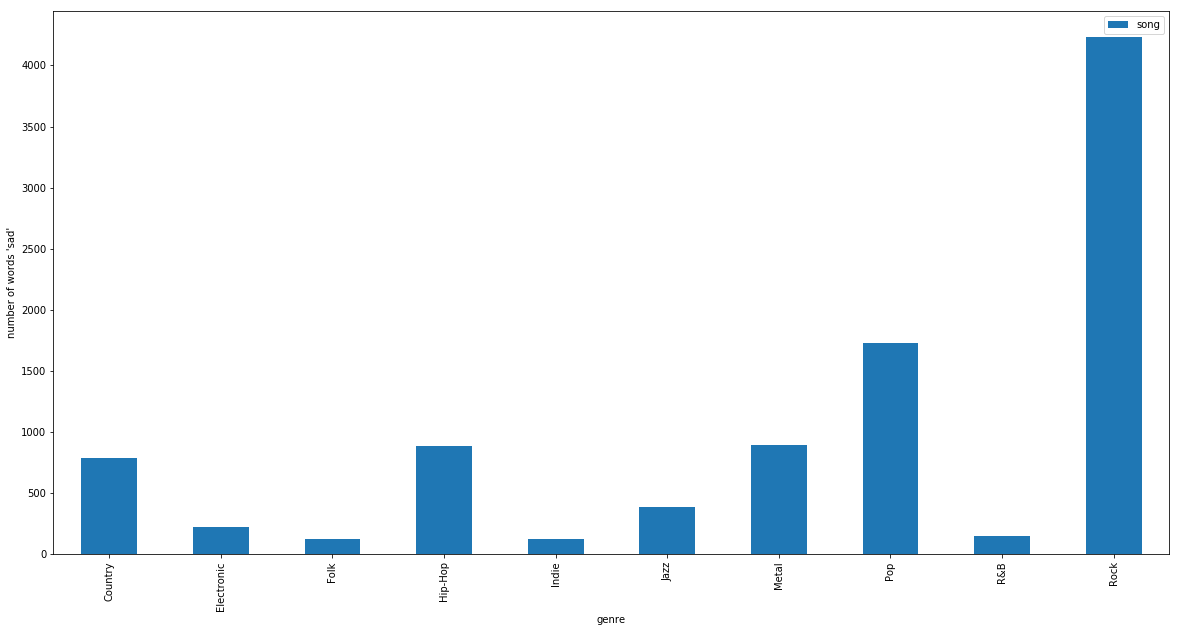

In [45]:
sad_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('sad')].count()))
sad_count.rename(columns={"lyrics":"song"}, inplace=True)
sad_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'sad'")
plt.show()

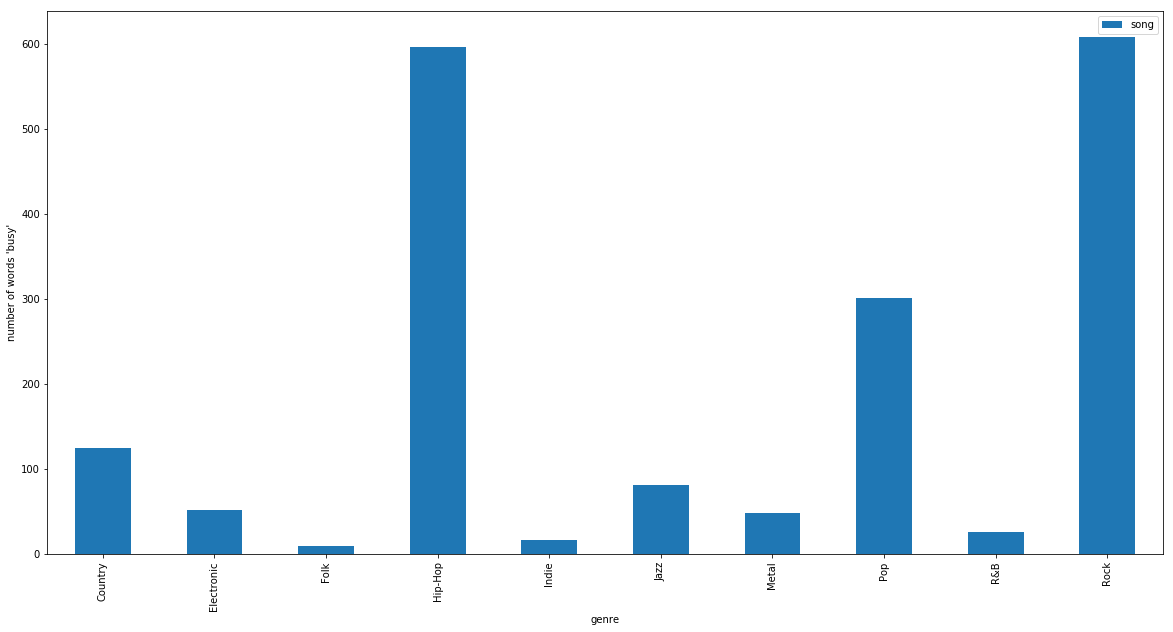

In [46]:
busy_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('busy')].count()))
busy_count.rename(columns={"lyrics":"song"}, inplace=True)
busy_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'busy'")
plt.show()

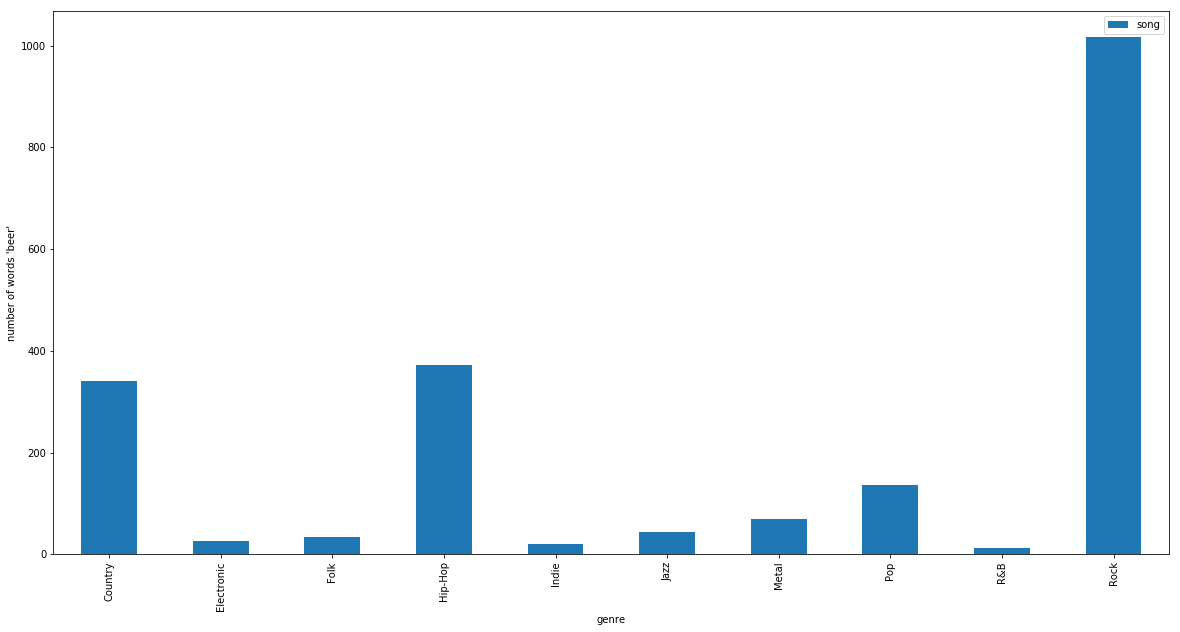

In [47]:
beer_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('beer')].count()))
beer_count.rename(columns={"lyrics":"song"}, inplace=True)
beer_count.plot(kind="bar", figsize=(20,10))
plt.ylabel("number of words 'beer'")
plt.show()

In [48]:
counts = genre.copy()
counts.rename(columns={"song":"song_count"}, inplace=True)
counts['fuck_count'] = fuck_count
counts['love_count'] = love_count
counts['sex_count'] = sex_count
counts['hate_count'] = hate_count
counts['weed_count'] = weed_count
counts['dead_count'] = dead_count
counts['happy_count'] = happy_count
counts['sad_count'] = sad_count
counts['busy_count'] = busy_count
counts['beer_count'] = beer_count
counts

,song_count,fuck_count,love_count,sex_count,hate_count,weed_count,dead_count,happy_count,sad_count,busy_count,beer_count
genre,,,,,,,,,,,
Country,14203,41,7534,74,569,73,384,792,789,125,341
Electronic,6989,309,2460,185,364,43,224,199,223,52,26
Folk,2016,19,661,7,74,16,113,81,123,10,34
Hip-Hop,23735,10985,9735,2003,5342,2036,2877,984,883,597,372
Indie,3027,104,1071,42,127,25,143,97,125,17,21
Jazz,7674,67,4092,48,284,26,147,534,385,82,44
Metal,21590,2042,3594,284,2316,101,3031,238,896,49,70
Pop,39595,874,18338,848,2260,116,864,1607,1726,301,137
R&B,3348,238,1657,65,214,17,144,140,152,26,13


In [49]:
ratios = pd.DataFrame(wine_count/genre)
ratios.rename(columns={"song":"wine_ratio"}, inplace=True)
ratios['fuck_ratio'] = fuck_count/genre
ratios['love_ratio'] = love_count/genre
ratios['sex_ratio'] = sex_count/genre
ratios['hate_ratio'] = hate_count/genre
ratios['weed_ratio'] = weed_count/genre
ratios['dead_ratio'] = dead_count/genre
ratios['happy_ratio'] = happy_count/genre
ratios['sad_ratio'] = sad_count/genre
ratios['busy_ratio'] = busy_count/genre
ratios['beer_ratio'] = beer_count/genre
ratios

,wine_ratio,fuck_ratio,love_ratio,sex_ratio,hate_ratio,weed_ratio,dead_ratio,happy_ratio,sad_ratio,busy_ratio,beer_ratio
genre,,,,,,,,,,,
Country,0.032106,0.002887,0.530451,0.005210,0.040062,0.005140,0.027037,0.055763,0.055552,0.008801,0.024009
Electronic,0.012591,0.044212,0.351982,0.026470,0.052082,0.006153,0.032050,0.028473,0.031907,0.007440,0.003720
Folk,0.027778,0.009425,0.327877,0.003472,0.036706,0.007937,0.056052,0.040179,0.061012,0.004960,0.016865
Hip-Hop,0.030588,0.462819,0.410154,0.084390,0.225068,0.085780,0.121213,0.041458,0.037202,0.025153,0.015673
Indie,0.018170,0.034357,0.353816,0.013875,0.041956,0.008259,0.047241,0.032045,0.041295,0.005616,0.006938
Jazz,0.020980,0.008731,0.533229,0.006255,0.037008,0.003388,0.019156,0.069586,0.050169,0.010685,0.005734
Metal,0.019407,0.094581,0.166466,0.013154,0.107272,0.004678,0.140389,0.011024,0.041501,0.002270,0.003242
Pop,0.013461,0.022073,0.463139,0.021417,0.057078,0.002930,0.021821,0.040586,0.043591,0.007602,0.003460
R&B,0.015532,0.071087,0.494922,0.019415,0.063919,0.005078,0.043011,0.041816,0.045400,0.007766,0.003883


In [51]:
from collections import Counter

# Define pandas df 
# Target, Lowercase all, sepertate by space, split all of them into individual
words = (df['lyrics']
         .str.lower()
         .str.cat(sep=' ')
         .split())

# generate DF out of Counter -> counter counts most common values 
# create column word, frequency, set the rows as word
rslt = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word')


#rslt.to_csv("stopwords.csv")
# Print the result
print(rslt)


              Frequency
Word                   
the             1990099
i               1632246
you             1538061
to              1132930
and             1118241
a               1010786
me               701285
my               685989
in               653047
it               567813
of               548524
your             475443
that             447697
on               424812
i'm              415605
is               366968
all              362876
for              349213
be               334111
we               329689
so               298335
don't            289794
with             284072
but              280996
like             275781
no               258201
know             254789
this             253459
it's             251275
just             249571
...                 ...
1)]                   1
grim)                 1
redeemed)             1
unnegotiable          1
.kingdom,             1
"dr                   1
dee"                  1
albarn.               1
...said         